In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [77]:
df = pd.read_csv('dmf.csv')
df

,dmf,flor
0,223,2.10
1,232,2.80
2,269,1.99
3,261,1.46
4,254,1.33
5,320,1.30
6,287,1.40
7,330,1.18
8,405,0.64
9,451,0.59


In [78]:
test_frac = 0.3
test = df.sample(frac=test_frac)
test_x = pd.DataFrame(test.iloc[:,1])
test_y = pd.DataFrame(test.iloc[:,0])

train = df.loc[~(df.index.isin(test.index))]
train_x = pd.DataFrame(train.iloc[:,1])
train_y = pd.DataFrame(train.iloc[:,0])
print(df.shape, test.shape, train.shape)

(2481, 2) (744, 2) (1737, 2)


In [79]:
m = sm.OLS(train_y,train_x)
model = m.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    dmf   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     555.8
Date:                Wed, 13 Feb 2019   Prob (F-statistic):          7.54e-107
Time:                        17:55:59   Log-Likelihood:                -13169.
No. Observations:                1737   AIC:                         2.634e+04
Df Residuals:                    1736   BIC:                         2.635e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
flor         229.7798      9.746     23.576      0.0

In [80]:
op = model.predict(test_x)
mse_final = mean_squared_error(test_y,op)
print(mse_final)

224206.30456258942


In [81]:
errors_final_model = []
ty = list(test_y.iloc[:,0])
lop = list(op)
print(len(lop),len(ty))
for i in range(len(lop)):
#     print(ty[i]-lop[i])
    temp = ty[i]-lop[i]
    errors_final_model.append(temp)
print(errors_final_model)

744 744
[-297.00446263177696, 644.8528573192771, 23.095120032630575, -0.09607041415654294, -54.393868025853294, 301.94095285140565, 454.1101194151607, 675.9814883672188, -29.500475190762984, 788.7462501543674, 663.8528573192771, -35.904879967369425, 639.3858931438253, 660.4704764257028, 641.5770835906125, 730.9154167181225, -68.79827280245979, -111.56303458960838, 651.5770835906125, -24.754225036395496, 9.584108091114501, -7.158629813001937, 665.8528573192771, 682.66166687249, 638.9594644841868, 792.9154167181225, 128.92244121862456, 778.6396429894578, 309.834345686496, 294.9629767344378, -12.011487132279058, 747.830833436245, 4.28631047941775, 543.7902979204317, 655.4704764257028, -51.20267757906623, 421.7277385215864, 436.4079170268575, 297.85636956952817, 587.6396429894578, 648.8748812023092, 265.665179122741, -17.371844142821203, 684.4264286596385, 663.9594644841868, 443.3013098619478, 277.85636956952817, -229.55952233935733, 671.7462501543674, -57.60708235567262, 107.8158340537149

(array([ 6., 15.,  7.,  9.,  1.,  0.,  5.,  4.,  6., 20., 21., 16.,  2.,
         4.,  0.,  4., 13., 15., 22., 50., 30., 12.,  6.,  4.,  7., 17.,
         4.,  2.,  0.,  3.,  9., 11., 19., 14., 14.,  7.,  1.,  1.,  4.,
         7., 18., 12.,  1.,  3.,  5., 15., 12., 10., 17., 37., 49., 45.,
        23., 25., 10., 20., 26., 18.,  5.,  1.]),
 array([-436.36130739, -415.04854552, -393.73578365, -372.42302178,
        -351.11025991, -329.79749804, -308.48473618, -287.17197431,
        -265.85921244, -244.54645057, -223.2336887 , -201.92092683,
        -180.60816496, -159.29540309, -137.98264122, -116.66987935,
         -95.35711748,  -74.04435561,  -52.73159374,  -31.41883187,
         -10.10607   ,   11.20669187,   32.51945374,   53.83221561,
          75.14497748,   96.45773934,  117.77050121,  139.08326308,
         160.39602495,  181.70878682,  203.02154869,  224.33431056,
         245.64707243,  266.9598343 ,  288.27259617,  309.58535804,
         330.89811991,  352.21088178,  373.523

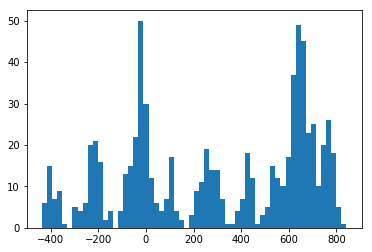

In [82]:
plt.hist(errors_final_model,bins=60)

# 2nd Approach - Flor^0.5

In [83]:
df2 = pd.DataFrame.copy(df)
df2['ur_flor'] = df['flor']**0.5
df2['logp1_flor'] = np.log10(df['flor']+1)

In [84]:
#Normalizing data
normalized_df2=(df2-df2.min())/(df2.max()-df2.min())
normalized_df2

,dmf,flor,ur_flor,logp1_flor
0,0.061856,0.716724,0.846595,0.826662
1,0.075110,0.955631,0.977564,0.975422
2,0.129602,0.679181,0.824124,0.800264
3,0.117820,0.498294,0.705899,0.657705
4,0.107511,0.453925,0.673740,0.618036
5,0.204713,0.443686,0.666098,0.608567
6,0.156112,0.477816,0.691242,0.639664
7,0.219440,0.402730,0.634610,0.569416
8,0.329897,0.218430,0.467365,0.361451
9,0.397644,0.201365,0.448737,0.338828


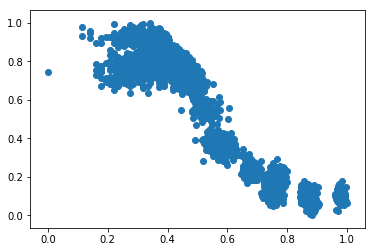

In [85]:
plt.scatter(np.log2(normalized_df2.iloc[:,2] + 1),normalized_df.iloc[:,0])

In [86]:
urtest_frac = 0.3
urtest = normalized_df2.sample(frac=urtest_frac)
urtest_x = pd.DataFrame(urtest.iloc[:,1:])
urtest_y = pd.DataFrame(urtest.iloc[:,0])

urtrain = normalized_df2.loc[~(normalized_df2.index.isin(test.index))]
urtrain_x = pd.DataFrame(urtrain.iloc[:,1:])
urtrain_y = pd.DataFrame(urtrain.iloc[:,0])
print(normalized_df2.shape, urtest.shape, urtrain.shape)

(2481, 4) (744, 4) (1737, 4)


In [87]:
urtest_x

,flor,ur_flor,logp1_flor
230,0.078498,0.280175,0.151255
2462,0.699659,0.836456,0.814781
469,0.716724,0.846595,0.826662
1699,0.126280,0.355359,0.230017
1058,0.494881,0.703477,0.654729
89,0.167235,0.408944,0.291367
2120,0.529010,0.727331,0.683959
2082,0.358362,0.598633,0.524492
2020,0.641638,0.801023,0.772877
1371,0.112628,0.335601,0.208367


In [88]:
urm = sm.OLS(urtrain_y,urtrain_x)
urmodel = urm.fit()
print(urmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                    dmf   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 2.747e+04
Date:                Wed, 13 Feb 2019   Prob (F-statistic):               0.00
Time:                        17:56:00   Log-Likelihood:                 1890.8
No. Observations:                1737   AIC:                            -3776.
Df Residuals:                    1734   BIC:                            -3759.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
flor           2.4359      0.049     49.631      0.0

In [91]:
urop = urmodel.predict(urtest_x)
urmse_final = mean_squared_error(urtest_y,urop)
print(urmse_final)

0.005972502726667913


In [96]:
urerrors = []
ty = list(test_y.iloc[:,0])
lop = list(urop)
print(len(lop),len(ty))
for i in range(len(lop)):
#     print(ty[i]-lop[i])
    temp = ty[i]-lop[i]
    urerrors.append(temp)

744 744


(array([ 2.,  3.,  2., 23., 28., 26., 33., 30., 20., 24., 24., 22., 15.,
        23., 15.,  6.,  4.,  3.,  3.,  9., 14., 10., 15., 12.,  8.,  5.,
         1.,  0.,  1.,  1.,  4.,  1., 10., 17.,  6.,  3.,  1.,  2.,  2.,
         2., 13., 14.,  9., 18., 13., 30., 37., 28., 25., 22., 14.,  9.,
         6., 10., 12., 21., 16., 10.,  5.,  2.]),
 array([180.87066727, 192.09255311, 203.31443895, 214.53632479,
        225.75821063, 236.98009648, 248.20198232, 259.42386816,
        270.645754  , 281.86763984, 293.08952568, 304.31141153,
        315.53329737, 326.75518321, 337.97706905, 349.19895489,
        360.42084073, 371.64272658, 382.86461242, 394.08649826,
        405.3083841 , 416.53026994, 427.75215578, 438.97404163,
        450.19592747, 461.41781331, 472.63969915, 483.86158499,
        495.08347083, 506.30535668, 517.52724252, 528.74912836,
        539.9710142 , 551.19290004, 562.41478588, 573.63667173,
        584.85855757, 596.08044341, 607.30232925, 618.52421509,
        629.746100

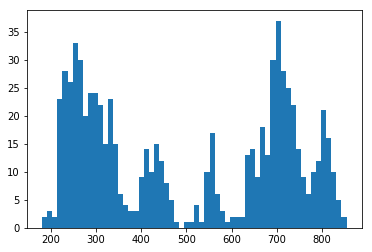

In [97]:
plt.hist(urerrors,bins=60)

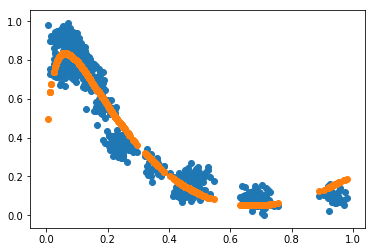

In [98]:
plt.scatter(urtest_x['flor'],urtest_y)
plt.scatter(urtest_x['flor'],urop)
plt.show()